In [175]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from n_clusters import *

Таблица с описанием исходных признаков:
| Признак | Описание |
| -  | - |
| child_mortality_rural | Число умерших на первом году жизни детей за год, по всем регионам, в сельской местности.|
| child_mortality_urban | Число умерших на первом году жизни детей за год, по всем регионам, в городской местности.|
| 18_30 | Число людей с инвалидностью в возрасте 18-30 лет. |
| 31_40 | Число людей с инвалидностью в возрасте 31-40 лет. |
| 41_50 | Число людей с инвалидностью в возрасте 41-50 лет. |
| 51_60 | Число людей с инвалидностью в возрасте 51-60 лет. |
| 60_ | Число людей с инвалидностью в возрасте 60+ лет. |
| poverty_percent | Процент людей, живущих за чертой бедности (с денежными доходами ниже величины прожиточного минимума). |
| welfare_expense_share | Расходы на социальную политику от общих расходов бюджета региона %. |
| cash_income_2017 | Среднедушевые денежные доходы населения (руб). |
| wage_paid_2017 | Номинальная начисленная зарплата (руб). |
| population | Численность постоянного населения. |
| gross_regional_product | Валовой региональный продукт на душу населения (руб). |
| regional_production | Суммарный объём отгруженных товаров собственного производства или работ/услуг, выполненных собственными силами. |
| retail_turnover_per_capita | Оборот розничной торговли на душу населения (руб). |
| alco | Кол-во установленных диагнозов алкоголизма на 100тыс. чел. |
| drugs | Кол-во установленных диагнозов наркомании на 100тыс. чел. |
| newborn | Рожденные без учёта мертворождённых. |

In [176]:
years = pd.read_excel('data/summary_data/years.xlsx')
pd.set_option('display.max_columns', 37)
print(f'Таблица с указанием наличия данных признаков по годам')
display(years)

Таблица с указанием наличия данных признаков по годам


,Feature,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,child_mortality_rural,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,
1,child_mortality_urban,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,
2,disabled_total_by_age,,,,,,,,,,,,,,,,,,,,,,,,,,,,Да,Да,Да,Да,Да,Да
3,poverty_percent,,,,,,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,,
4,welfare_expense_share,,,,,,,,,,,,,,,,,,,,,,,,,,Да,Да,Да,Да,Да,Да,,
5,cash_real_income,,,,,,,,,,,,,,,,,,,,,,,,,,Да,Да,Да,Да,Да,Да,,
6,cash_wages,,,,,,,,,,,,,,,,,,,,,,,,,,Да,Да,Да,Да,Да,Да,,
7,population,,,,,,,,,,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да
8,gross_regional_product,,,,,,,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,,
9,regional_production,,,,,,,,,,,,,,,,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,Да,,


Загружает датасет с данными 2017 года

In [177]:
data = pd.read_csv('data/summary_data/2017.csv',index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Region                      83 non-null     object 
 1   child_mortality_rural       83 non-null     float64
 2   child_mortality_urban       83 non-null     float64
 3   18_30                       83 non-null     float64
 4   31_40                       83 non-null     float64
 5   41_50                       83 non-null     float64
 6   51_60                       83 non-null     float64
 7   60_                         83 non-null     float64
 8   poverty_percent             83 non-null     float64
 9   welfare_expense_share       83 non-null     float64
 10  cash_income_2017            83 non-null     float64
 11  wage_paid_2017              83 non-null     float64
 12  population                  83 non-null     float64
 13  gross_regional_product      83 non-nu

Построим корреляционную таблицу признаков

<AxesSubplot:>

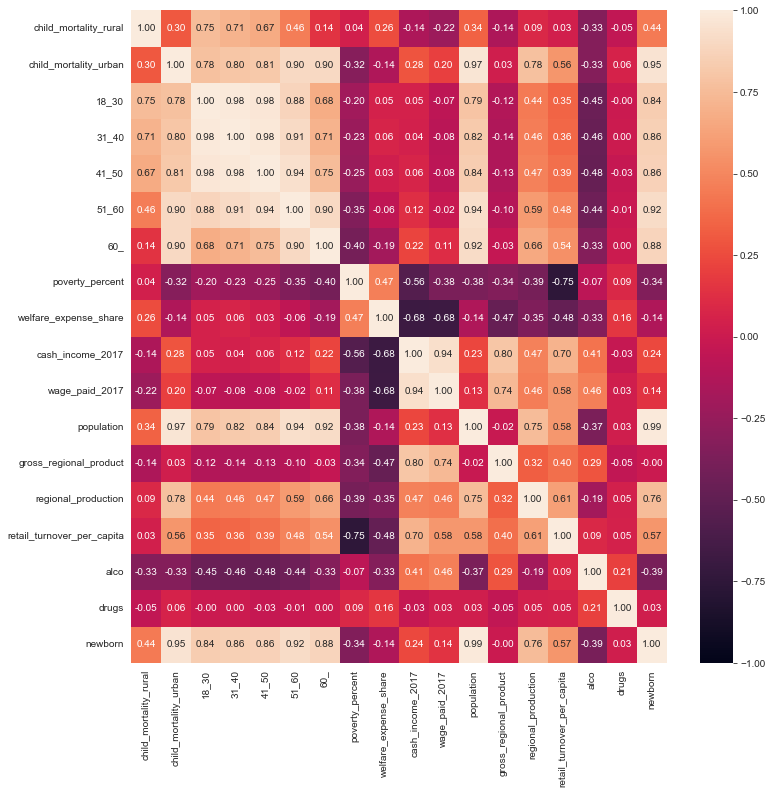

In [178]:
corr_data = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_data,annot=True,vmin=-1,vmax=1,fmt='.2f')

Удалим признаки с высокой корреляцией: \
Признаки 18_30, 31_40, 41_50, 51_60, 60_ отражающие кол-во инвалидов по возрастным группам сложим в один признак disabled_total; \
Удалим признак child_mortality_urban обладающий высокой корреляцией с признаками population и newborn; \
Получившийся признак disabled_total сильно коррелирует с признакми population и newborn, также коррелированных между собой, оставим признак population (Имеется больше данных); \
Из коррелирующих признаков cash_income_2017 и wage_paid_2017 оставим cash_income_2017.

In [179]:
data['disabled_total'] = data['18_30'] + data['31_40'] + data['41_50'] + data['51_60'] + data['60_']
data.drop(['18_30','31_40','41_50','51_60','60_'],axis=1,inplace=True)
data.drop(['child_mortality_urban'],axis=1,inplace=True)
data.drop(['disabled_total','newborn'],axis=1,inplace=True)
data.drop(['wage_paid_2017'],axis=1,inplace=True)

Новая таблица корреляций оставшихся признаков:

<AxesSubplot:>

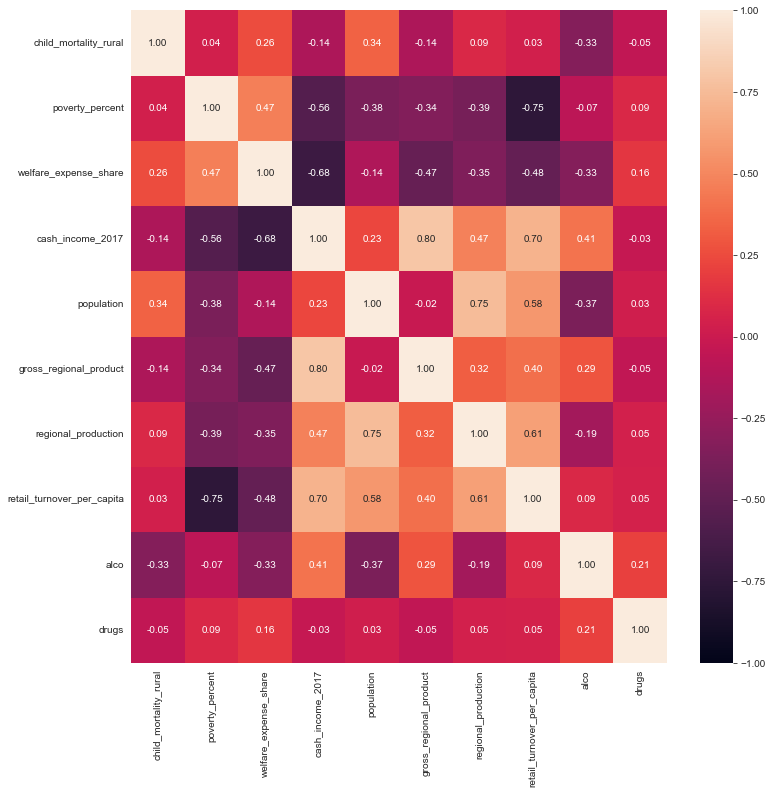

In [180]:
corr_data = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_data,annot=True,vmin=-1,vmax=1,fmt='.2f')

Применим MinMaxScaler для равновесного вклада признаков в построение KMeans модели

In [181]:
scaler = MinMaxScaler()
X = data.drop(['Region'],axis=1)
scaler.fit(X)
Reg = pd.DataFrame(data['Region'])
col_names = X.columns
scaler_data = Reg.join(pd.DataFrame(scaler.transform(X),columns=col_names))

Подбор оптимального кол-ва кластеров для KMeans с помощью методов локтя и силуэта

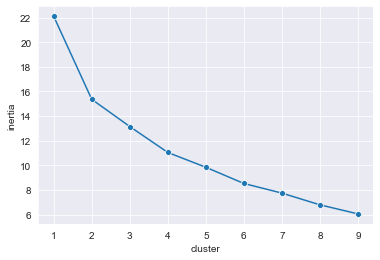

In [182]:
elbow(scaler_data)

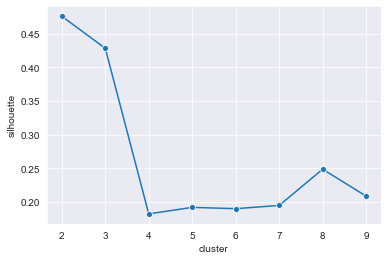

In [183]:
silhouette(scaler_data)

Построение модели кластеризации KMeans (n_clusters=2)

In [208]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = scaler_data.drop(['Region'],axis=1)
kmeans.fit(X)
prediction = kmeans.predict(X)
predictions = kmeans.labels_
scaler_data['prediction'] = predictions

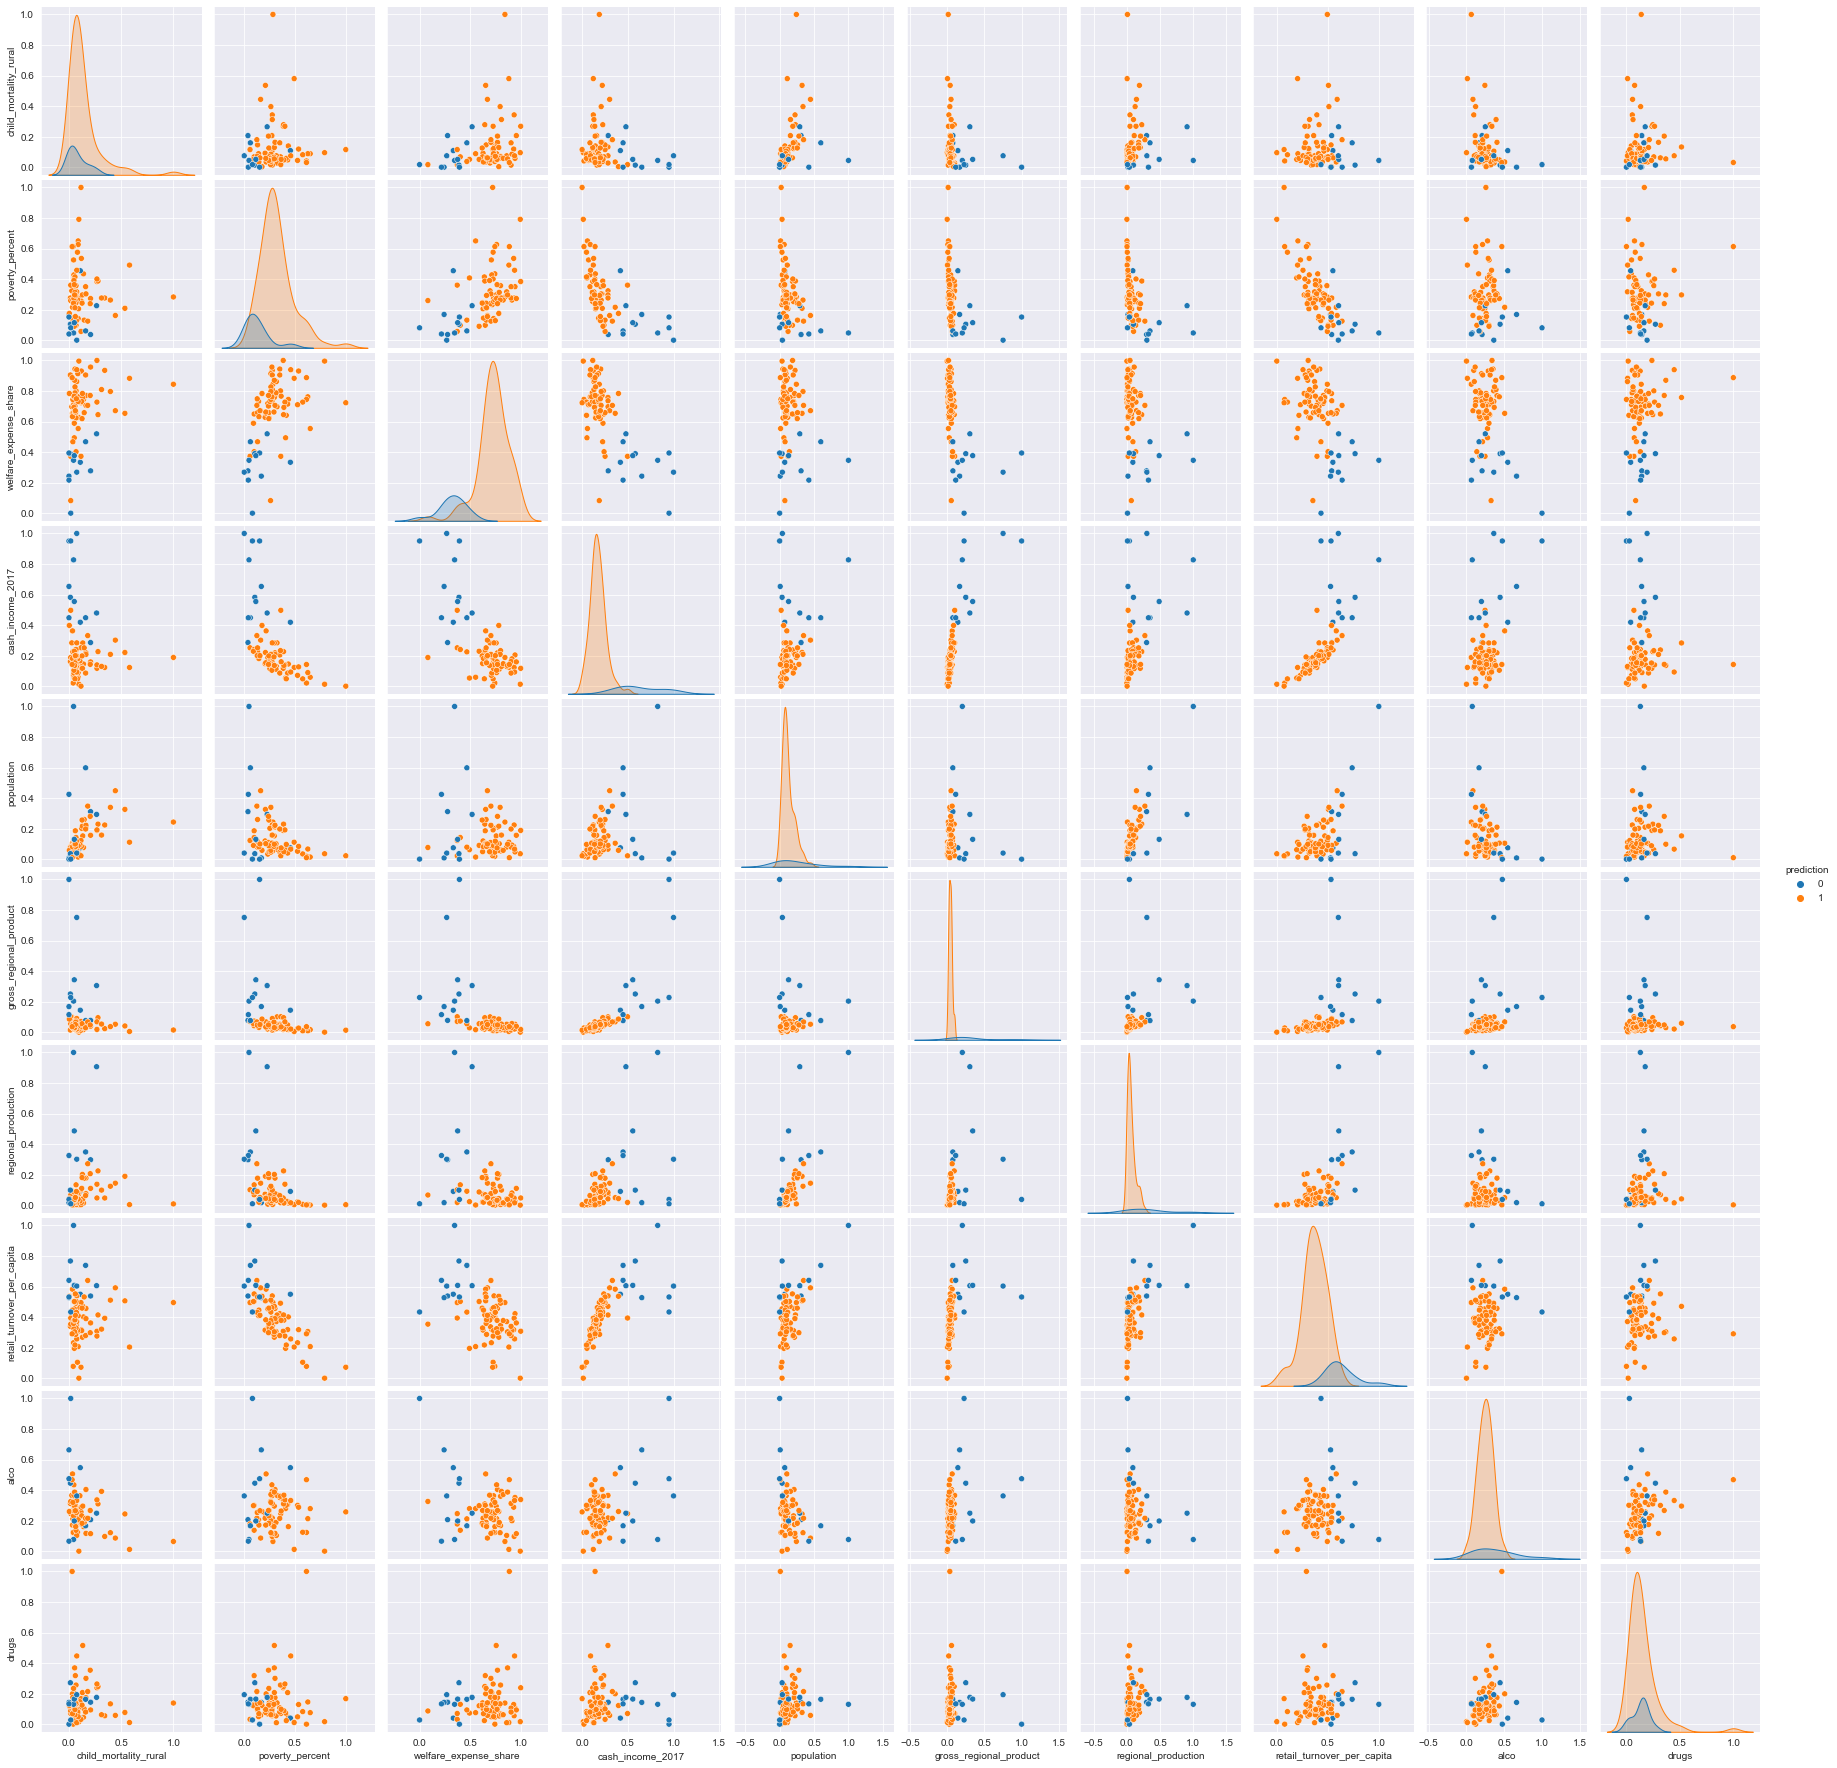

In [185]:
sns.pairplot(scaler_data,hue='prediction')

In [209]:
scaler_data.groupby('prediction',as_index=False).median()

,prediction,child_mortality_rural,poverty_percent,welfare_expense_share,cash_income_2017,population,gross_regional_product,regional_production,retail_turnover_per_capita,alco,drugs
0,0,0.047458,0.092593,0.339827,0.567999,0.102176,0.215167,0.299126,0.604368,0.305195,0.143151
1,1,0.074576,0.276094,0.731602,0.158909,0.092401,0.038883,0.041182,0.377213,0.253050,0.113699


In [218]:
print(f"Кол-во регионов в первом (условно благополучном) кластере: {scaler_data['prediction'].value_counts()[0]}, регионов во втором (условно неблагополучном) кластере: {scaler_data['prediction'].value_counts()[1]}")

Кол-во регионов в первом (условно благополучном) кластере: 12, регионов во втором (условно неблагополучном) кластере: 71


На основе сравнения различий медианных значений признаков полученных кластеров формируем зависимости признаков для выявления регионов остро нуждающихся в помощи малообеспеченным/неблагополучным слоям населения:  

 Высокий % людей живущих за чертой бедности; \
 Высокий % расходов на социальную политику; \
 Низкие среднедушевные доходы населения; \
 Низкий валовый продукт на душу населения; \
 Низкий суммарный объем товаров/услуг; \
 Низкий оборот розничной торговли.

 Распределение значений признаков алкоголизма и наркомании +- равномерно по обоим кластерам. Зависимости не наблюдается.

Пробуем построить модель KMeans с кол-вом кластеров = 3

In [205]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
X = scaler_data.drop(['Region'],axis=1)
kmeans.fit(X)
prediction = kmeans.predict(X)
predictions = kmeans.labels_
scaler_data['prediction'] = predictions

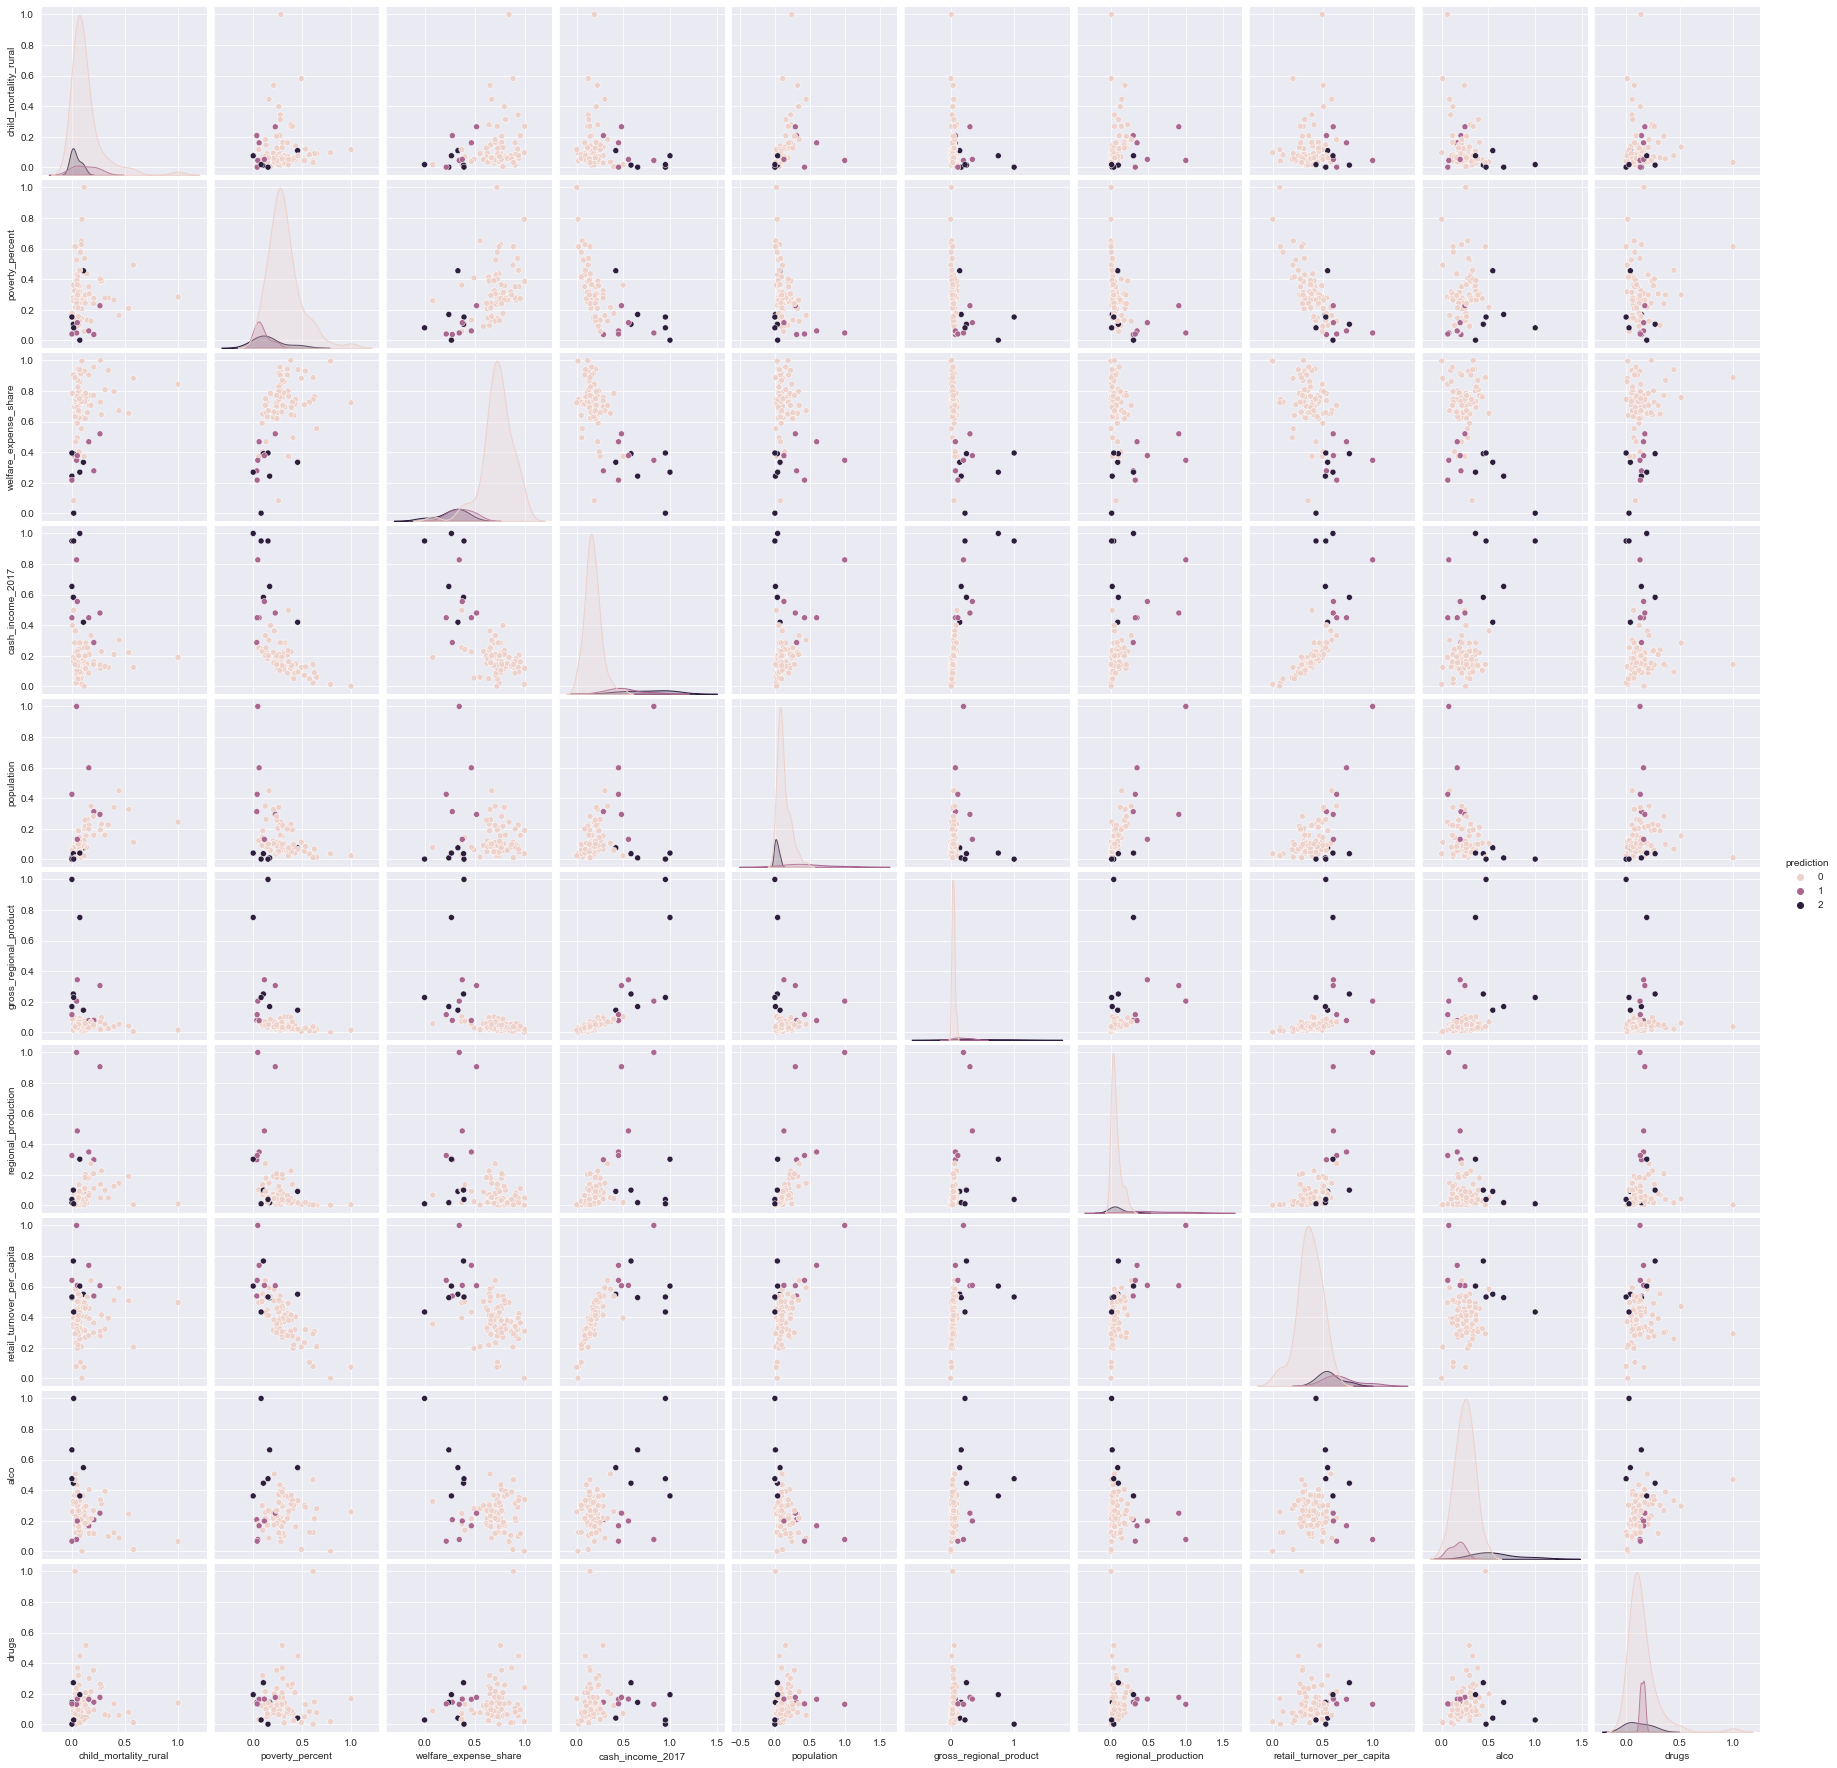

In [171]:
sns.pairplot(scaler_data,hue='prediction')

In [206]:
scaler_data.groupby('prediction',as_index=False).median()

,prediction,child_mortality_rural,poverty_percent,welfare_expense_share,cash_income_2017,population,gross_regional_product,regional_production,retail_turnover_per_capita,alco,drugs
0,0,0.074576,0.276094,0.731602,0.158909,0.092401,0.038883,0.041182,0.377213,0.253050,0.113699
1,1,0.105085,0.053872,0.361472,0.463518,0.367965,0.159074,0.417195,0.624131,0.181818,0.153425
2,2,0.015254,0.127946,0.300866,0.801757,0.022090,0.238482,0.063854,0.540659,0.510429,0.091096


In [207]:
scaler_data['prediction'].value_counts()

0    71
2     6
1     6
Name: prediction, dtype: int64

В результате построения модели с 3 кластерами, интересующий нас условно неблагополучный кластер остался неизменным. Условно благополучный кластер был разбит еще на два кластера. \
Нельзя сказать, что разбитие проиозошло с сохранением линейности "благополучия" регионов кластеров. Полученные два кластера отличаются по своим признакам. Один из кластеров представляет регионы с низкой популяцией и высоким доходом населения, высоким валовым продуктом и низким кол-вом товаров/услуг, а также очень высоким уровнем алкоголизма. \
По данных характеристикам, в целом, можно сказать, что это регионы с наличием большого числа вахтовой работы, связанной с добычей полезных ископаемых, и низкой популяцией коренного населения.

Обратим внимание, что данный кластер обладает низким суммарным объемом товаров/услуг, практически, на равне с условно неблагополучным кластером. В противовес обладая высоким значением валового продукта. Остальные зависимости, отмеченные нами, по результату анализа модели с двумя кластерами, сохраняются.